In [1]:
import networkx as nx
import matplotlib.pyplot as plt

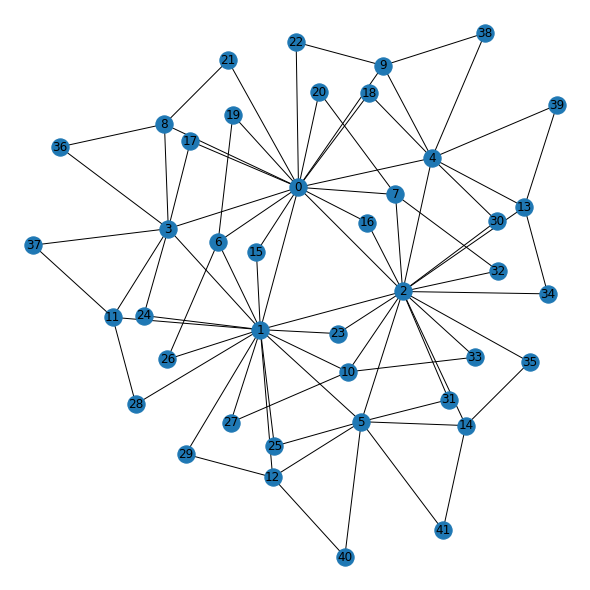

In [2]:
G = nx.dorogovtsev_goltsev_mendes_graph(4)
plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G,with_labels=1)
plt.show()

# Fixed Colors 

In [3]:
#For a easy example, we set the even vertex as blue and the odd vertex as red
blueVertix=[]
redVertex=[]
for node in G.nodes():
    if(node%2==0):
        blueVertix.append(node)
    else:
        redVertex.append(node)        

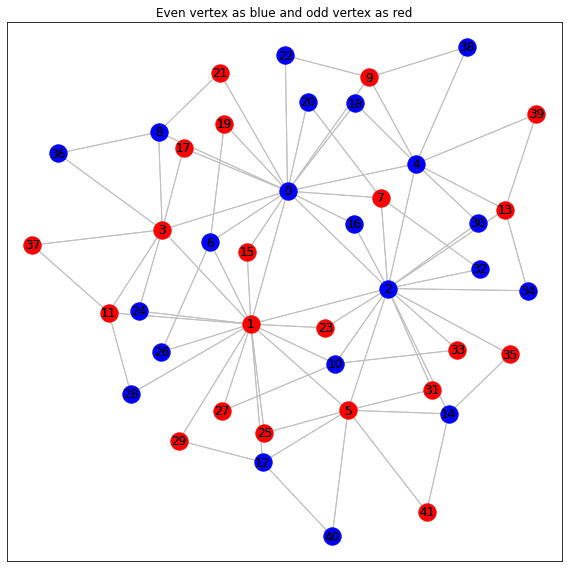

In [4]:
plt.figure(figsize=(8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=1, nodelist=redVertex, node_color='red', edge_color='silver')
nx.draw_networkx(G, pos, with_labels=1, nodelist=blueVertix, node_color='blue', edge_color='silver')
plt.title("Even vertex as blue and odd vertex as red")
plt.tight_layout()
plt.show()

# Dinamic Node Size
###### Here que use the degree to scale the node size

{0: 16, 1: 16, 2: 16, 3: 8, 4: 8, 5: 8, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2}


 The degrees in this graph are between 2 and 16. So are the node sizes. We need to make these values relatives to a value.


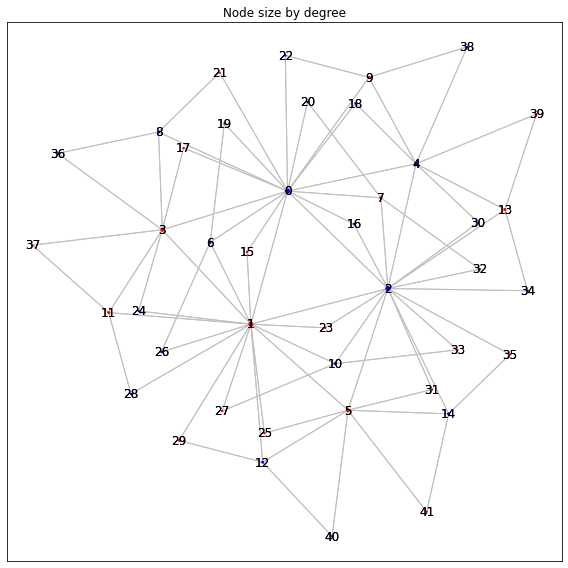



 The degrees in this graph are between 2 and 16. So are the node sizes. We need to make these values relatives to a value.


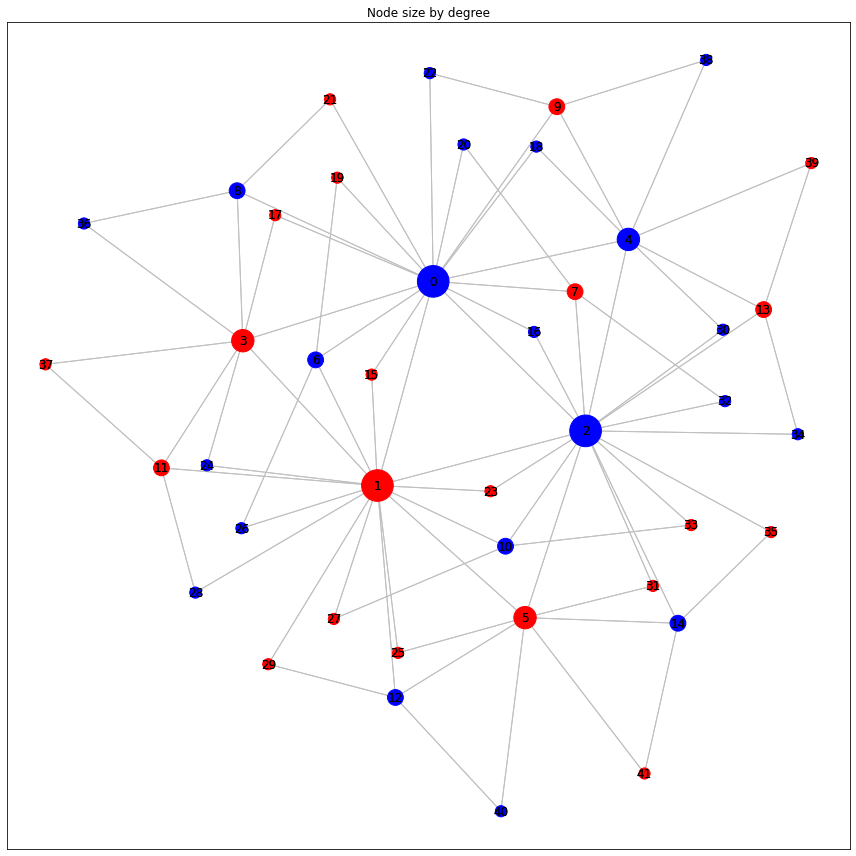

In [5]:
degree = dict(G.degree())
print(degree)
plt.figure(figsize=(8,8))
nx.draw_networkx(G, pos, with_labels=1, nodelist=redVertex, node_color='red',edge_color='silver', node_size=[int(degree[v]) for v in redVertex])
nx.draw_networkx(G, pos, with_labels=1, nodelist=blueVertix, node_color='blue',edge_color='silver', node_size=[int(degree[v]) for v in blueVertix])
plt.title("Node size by degree")
plt.tight_layout()
print('\n\n The degrees in this graph are between 2 and 16. So are the node sizes. We need to make these values relatives to a value.')
plt.show()

#### The bigger node will be size 100, other nodes sizes area relatives to this.
#### In a scale-free graph, this relativization can be done considering the log of values
biggerDegree = max(degree.values())
factor = 1000/biggerDegree

plt.figure(figsize=(12,12))
nx.draw_networkx(G, pos, with_labels=1, nodelist=redVertex, node_color='red',edge_color='silver', node_size=[int(degree[v]) * factor for v in redVertex])
nx.draw_networkx(G, pos, with_labels=1, nodelist=blueVertix, node_color='blue',edge_color='silver', node_size=[int(degree[v]) * factor for v in blueVertix])
plt.title("Node size by degree")
plt.tight_layout()
print('\n\n The degrees in this graph are between 2 and 16. So are the node sizes. We need to make these values relatives to a value.')
plt.show()

# Dinamic Node Color
###### Here que use the degree to scale the node color

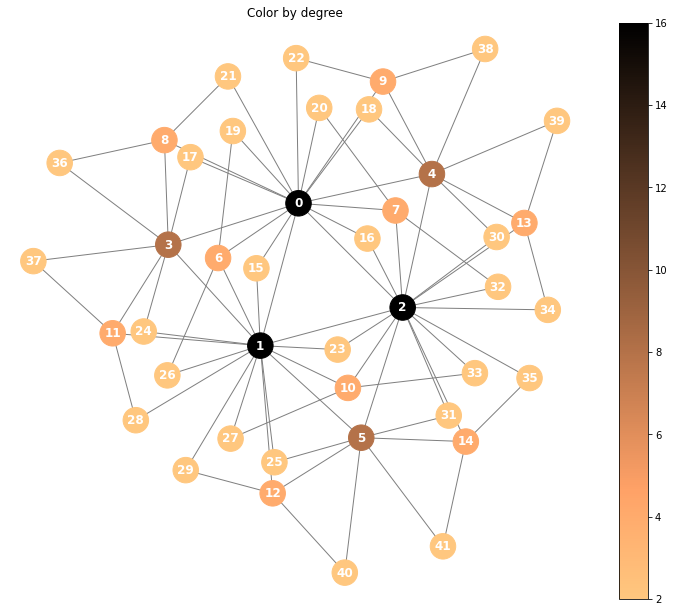

In [6]:
degree = [t[1] for t in list(G.degree)]            
vmin = min(degree)
vmax = max(degree)
cmap = plt.cm.copper_r
fig=plt.figure(figsize=(10, 8))
nx.draw_kamada_kawai(G,with_labels=1,node_size=650,node_color=degree,cmap=cmap, vmin=vmin, vmax=vmax,edge_color='gray',font_weight='bold',font_color='white')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.title('Color by degree')
plt.show()

# Shapes
###### Useful to categorize the nodes. Here all nodes have degrees 2, 4, 8, or 16, so we create 4 categories.
###### We also add different colors and sizes to show it's possible, even though in this example is too much information

In [7]:
set16=[]
set8=[]
set4=[]
set2=[]
for k,v in (G.degree()):
    if(v==16):
        set16.append(k)
    elif(v==8):
        set8.append(k)
    elif(v==4):
        set4.append(k)
    else:
        set2.append(k)        

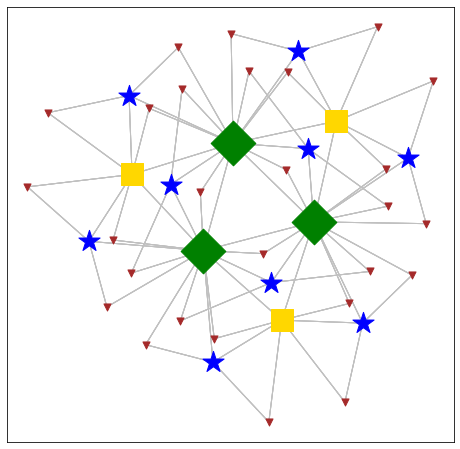

In [8]:
plt.figure(figsize=(8,8))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=0, nodelist=set16, node_color='green', node_shape='D',edge_color='silver', node_size=1000)
nx.draw_networkx(G, pos, with_labels=0, nodelist=set8, node_color='gold', node_shape='s',edge_color='silver', node_size=500)
nx.draw_networkx(G, pos, with_labels=0, nodelist=set4, node_color='blue', node_shape='*',edge_color='silver', node_size=500)
nx.draw_networkx(G, pos, with_labels=0, nodelist=set2, node_color='brown', node_shape='v',edge_color='silver', node_size=50)